In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def fdjac(f, x, fx):
    #前向差分计算jacobi矩阵
    m = len(fx) #获取行数
    n = len(x) #获取列数

    J = np.zeros((m, n)) #初始构建

    h = np.sqrt(np.finfo(float).eps) #取步长为e_mach的平方根

    for j in range(n):
        x_h = x.copy()
        x_h[j] += x_h[j] + h
        fx_h = f(x_h)

        J[:, j] = (fx_h - fx) / h

    return J

def levenberg(f, x1, tol=1e-5):
    maxiter = 100
    n = len(x1)
    fk = f(x1)
    x = np.zeros((maxiter, n))
    x[0] = x1
    Ak = fdjac(f, x1, fk)

    k = 0
    lam = 10.0
    jac_is_new = True
    delta_p = 10.0

    while np.linalg.norm(fk) > tol and k < maxiter - 1 and np.linalg.norm(delta_p) > tol:
        B = (Ak.T @ Ak) + lam * np.eye(n)
        z = - Ak.T @ fk

        delta_p = np.linalg.lstsq(B, z)[0]
        xnew = x[k] + delta_p
        fnew = f(xnew)

        if np.linalg.norm(fnew) < np.linalg.norm(fk):
            y = fnew - fk           # y_k = f_{k+1} - f_k
            x[k+1] = xnew         # 接受新点
            fk = fnew               # 更新
            Ak = Ak + np.outer(y - Ak @ delta_p, delta_p / np.dot(delta_p.T, delta_p))

            k += 1
            lam /= 10 #更激进 接近高斯牛顿法
            jac_is_new = False #标记Ak未重新更新 是由broyden迭代法迭代而来
        else:
            lam = lam * 4 #保守策略 退化为梯度法
            # 那么这个近似可能已经太差了，需要重新计算
            if not jac_is_new:
                # 支付高昂成本 重新计算一个新的 J
                Ak = fdjac(f, x[k], fk)
                jac_is_new = True
    if np.linalg.norm(fk) > tol:
        #如果迭代完成后还是很大 则说明未找到根
        print("Iteration did not find a root.")

    return x[k]

def shoot(phi, a, b, ga, gb, init):
    # Tolerances for IVP solver and rootfinder.
    tol = 1e-5
    # To be solved by the IVP solver
    def shootivp(x, y):
        return np.array([y[1], phi(x, y[0], y[1])])

    # Evaluate the difference between computed and target values at x=b.
    def objective(s):
        nonlocal x, y  # change these values in outer scope

        x = np.linspace(a, b, 400)  # make decent plots on return
        sol = solve_ivp(shootivp, [a, b], s, atol=tol/10, rtol=tol/10, t_eval=x)
        x = sol.t
        y = sol.y
        residual = np.array([ga(y[0, 0], y[1, 0]), gb(y[0, -1], y[0, -1])])
        return residual

    # Find the unknown quantity at x=a by rootfinding.
    x, y = [], []    # the values will be overwritten
    s = levenberg(objective, init, tol)

    # Don't need to solve the IVP again. It was done within the
    # objective function already.
    u = y[0]        # solution
    du_dx = y[1]    # derivative

    return x, u, du_dx

Iteration did not find a root.
Iteration did not find a root.


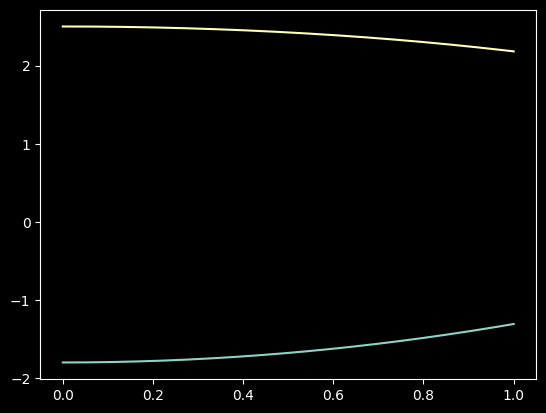

In [9]:
#10.2.2
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def fdjac(f, x, fx):
    #前向差分计算jacobi矩阵
    m = len(fx) #获取行数
    n = len(x) #获取列数

    J = np.zeros((m, n)) #初始构建

    h = np.sqrt(np.finfo(float).eps) #取步长为e_mach的平方根

    for j in range(n):
        x_h = x.copy()
        x_h[j] += x_h[j] + h
        fx_h = f(x_h)

        J[:, j] = (fx_h - fx) / h

    return J

def levenberg(f, x1, tol=1e-5):
    maxiter = 100
    n = len(x1)
    fk = f(x1)
    x = np.zeros((maxiter, n))
    x[0] = x1
    Ak = fdjac(f, x1, fk)

    k = 0
    lam = 10.0
    jac_is_new = True
    delta_p = 10.0

    while np.linalg.norm(fk) > tol and k < maxiter - 1 and np.linalg.norm(delta_p) > tol:
        B = (Ak.T @ Ak) + lam * np.eye(n)
        z = - Ak.T @ fk

        delta_p = np.linalg.lstsq(B, z)[0]
        xnew = x[k] + delta_p
        fnew = f(xnew)

        if np.linalg.norm(fnew) < np.linalg.norm(fk):
            y = fnew - fk           # y_k = f_{k+1} - f_k
            x[k+1] = xnew         # 接受新点
            fk = fnew               # 更新
            Ak = Ak + np.outer(y - Ak @ delta_p, delta_p / np.dot(delta_p.T, delta_p))

            k += 1
            lam /= 10 #更激进 接近高斯牛顿法
            jac_is_new = False #标记Ak未重新更新 是由broyden迭代法迭代而来
        else:
            lam = lam * 4 #保守策略 退化为梯度法
            # 那么这个近似可能已经太差了，需要重新计算
            if not jac_is_new:
                # 支付高昂成本 重新计算一个新的 J
                Ak = fdjac(f, x[k], fk)
                jac_is_new = True
    if np.linalg.norm(fk) > tol:
        #如果迭代完成后还是很大 则说明未找到根
        print("Iteration did not find a root.")

    return x[k]

def shoot(phi, a, b, ga, gb, init):
    # Tolerances for IVP solver and rootfinder.
    tol = 1e-5
    # To be solved by the IVP solver
    def shootivp(x, y):
        return np.array([y[1], phi(x, y[0], y[1])])

    # Evaluate the difference between computed and target values at x=b.
    def objective(s):
        nonlocal x, y  # change these values in outer scope

        x = np.linspace(a, b, 400)  # make decent plots on return
        sol = solve_ivp(shootivp, [a, b], s, atol=tol/10, rtol=tol/10, t_eval=x)
        x = sol.t
        y = sol.y
        residual = np.array([ga(y[0, 0], y[1, 0]), gb(y[0, -1], y[0, -1])])
        return residual

    # Find the unknown quantity at x=a by rootfinding.
    x, y = [], []    # the values will be overwritten
    s = levenberg(objective, init, tol)

    # Don't need to solve the IVP again. It was done within the
    # objective function already.
    u = y[0]        # solution
    du_dx = y[1]    # derivative

    return x, u, du_dx

ode = lambda t, theta, d_theta: -np.sin(theta)
ga = lambda theta, d_theta: d_theta
gb = lambda theta, d_theta: theta - np.pi / 2

a, b = np.finfo(float).eps, 1.
t = np.linspace(a, b, 50)

init_1 = np.array([-1.8, 0])
init_2 = np.array([2.5, 0])

x1, u1, _ = shoot(ode, a, b, ga, gb, init=init_1)
x2, u2, _ = shoot(ode, a, b, ga, gb, init=init_2)

plt.plot(x1, u1)
plt.plot(x2, u2)


Iteration did not find a root.
1.9999999888150508 12315.294261988893


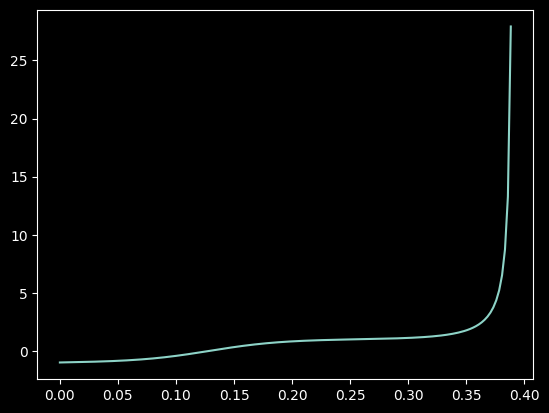

In [15]:
#10.2.3
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def fdjac(f, x, fx):
    #前向差分计算jacobi矩阵
    m = len(fx) #获取行数
    n = len(x) #获取列数

    J = np.zeros((m, n)) #初始构建

    h = np.sqrt(np.finfo(float).eps) #取步长为e_mach的平方根

    for j in range(n):
        x_h = x.copy()
        x_h[j] += x_h[j] + h
        fx_h = f(x_h)

        J[:, j] = (fx_h - fx) / h

    return J

def levenberg(f, x1, tol=1e-5):
    maxiter = 100
    n = len(x1)
    fk = f(x1)
    x = np.zeros((maxiter, n))
    x[0] = x1
    Ak = fdjac(f, x1, fk)

    k = 0
    lam = 10.0
    jac_is_new = True
    delta_p = 10.0

    while np.linalg.norm(fk) > tol and k < maxiter - 1 and np.linalg.norm(delta_p) > tol:
        B = (Ak.T @ Ak) + lam * np.eye(n)
        z = - Ak.T @ fk

        delta_p = np.linalg.lstsq(B, z)[0]
        xnew = x[k] + delta_p
        fnew = f(xnew)

        if np.linalg.norm(fnew) < np.linalg.norm(fk):
            y = fnew - fk           # y_k = f_{k+1} - f_k
            x[k+1] = xnew         # 接受新点
            fk = fnew               # 更新
            Ak = Ak + np.outer(y - Ak @ delta_p, delta_p / np.dot(delta_p.T, delta_p))

            k += 1
            lam /= 10 #更激进 接近高斯牛顿法
            jac_is_new = False #标记Ak未重新更新 是由broyden迭代法迭代而来
        else:
            lam = lam * 4 #保守策略 退化为梯度法
            # 那么这个近似可能已经太差了，需要重新计算
            if not jac_is_new:
                # 支付高昂成本 重新计算一个新的 J
                Ak = fdjac(f, x[k], fk)
                jac_is_new = True
    if np.linalg.norm(fk) > 1e-3:
        #如果迭代完成后还是很大 则说明未找到根
        print("Iteration did not find a root.")

    return x[k]

def shoot(phi, a, b, ga, gb, init):
    # Tolerances for IVP solver and rootfinder.
    tol = 1e-5
    # To be solved by the IVP solver
    def shootivp(x, y):
        return np.array([y[1], phi(x, y[0], y[1])])

    # Evaluate the difference between computed and target values at x=b.
    def objective(s):
        nonlocal x, y  # change these values in outer scope

        x = np.linspace(a, b, 400)  # make decent plots on return
        sol = solve_ivp(shootivp, [a, b], s, atol=tol/10, rtol=tol/10, t_eval=x)
        x = sol.t
        y = sol.y
        residual = np.array([ga(y[0, 0], y[1, 0]), gb(y[0, -1], y[0, -1])])
        return residual
    x, y = [], []
    s = levenberg(objective, init, tol)

    u = y[0]
    du_dx = y[1]

    return x, u, du_dx

eps = 0.002
ode = lambda t, u, du_dt: u**3 / eps - u / eps
ga = lambda u, du_dt: u + 1
gb = lambda u, du_dt: u - 1
a, b = np.finfo(float).eps, 1.
init = np.array([-1, 2])

x, u, du_dx = shoot(ode, a, b, ga, gb, init=init)
plt.plot(x, u)
print(du_dx[0], du_dx[-1])